In [2]:
import pandas as pd
import numpy as np
import psycopg2

from matplotlib import pyplot as plt
import seaborn as sns
from bokeh.io import output_notebook, show
from bokeh import mpl
from bokeh.charts import TimeSeries

C:\Users\ddiaz\AppData\Local\Continuum\Anaconda2\envs\Py3.5\lib\site-packages\bokeh\util\deprecation.py:34: BokehDeprecationWarning: MPL compatibility can no longer be successfully maintained, and is now deprecated. All MPL compat functions will be removed completely on the release of Bokeh 1.0. See http://bokeh.pydata.org/en/latest/docs/releases/0.12.5.html for more information
  warn(message)
C:\Users\ddiaz\AppData\Local\Continuum\Anaconda2\envs\Py3.5\lib\site-packages\bokeh\util\deprecation.py:34: BokehDeprecationWarning: 
The bokeh.charts API has moved to a separate 'bkcharts' package.

This compatibility shim will remain until Bokeh 1.0 is released.
After that, if you want to use this API you will have to install
the bkcharts package explicitly.

  warn(message)


In [3]:
%matplotlib inline
output_notebook()

Loading BokehJS ...

### Pull the carbon and timber outputs from the FVSOut database for each stand and prescription

In [4]:
conn = psycopg2.connect("dbname='FVSOut' user='postgres' host='localhost'") # password in pgpass file
SQL = '''
SELECT fvs_summary.*, fvs_cases.mgmtid, fvs_cases.variant
FROM fvs_summary, fvs_cases
WHERE fvs_summary.caseid = fvs_cases.caseid;
'''
# read the query into a pandas dataframe
FVSOut = pd.read_sql(SQL, conn)

# close the database connection
conn.close()

In [5]:
# strip whitespace from FVSOut mgmtids
FVSOut['mgmtid'] = FVSOut.mgmtid.str.strip()

In [15]:
conn = psycopg2.connect("dbname='FVSOut' user='postgres' host='localhost'") # password in pgpass file
SQL = '''
SELECT fvs_carbon.standid, fvs_carbon.year, fvs_carbon.total_stand_carbon, fvs_hrv_carbon.products, fvs_cases.mgmtid, fvs_cases.variant
FROM fvs_carbon, fvs_hrv_carbon, fvs_cases
WHERE fvs_carbon.caseid = fvs_cases.caseid AND fvs_carbon.caseid = fvs_hrv_carbon.caseid
AND fvs_carbon.year = fvs_hrv_carbon.year;
'''
# read the query into a pandas dataframe
FVSCarbon = pd.read_sql(SQL, conn)

# close the database connection
conn.close()

In [16]:
# strip whitespace from FVSOut mgmtids
FVSCarbon['mgmtid'] = FVSCarbon.mgmtid.str.strip()

In [8]:
FVSOut.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50400 entries, 0 to 50399
Data columns (total 31 columns):
caseid     50400 non-null object
standid    50400 non-null object
year       50400 non-null int64
age        50400 non-null int64
tpa        50400 non-null float64
ba         50400 non-null float64
sdi        50400 non-null float64
ccf        50400 non-null float64
topht      50400 non-null float64
qmd        50400 non-null float64
tcuft      50400 non-null float64
mcuft      50400 non-null float64
bdft       50400 non-null float64
rtpa       50400 non-null float64
rtcuft     50400 non-null float64
rmcuft     50400 non-null float64
rbdft      50400 non-null float64
atba       50400 non-null float64
atsdi      50400 non-null float64
atccf      50400 non-null float64
attopht    50400 non-null float64
atqmd      50400 non-null float64
prdlen     50400 non-null int64
acc        50400 non-null float64
mort       50400 non-null float64
mai        50400 non-null float64
fortyp     5040

In [17]:
FVSCarbon.info() # carbon is not output for the last year of the simulation (2114)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48000 entries, 0 to 47999
Data columns (total 6 columns):
standid               48000 non-null object
year                  48000 non-null int64
total_stand_carbon    48000 non-null float64
products              48000 non-null float64
mgmtid                48000 non-null object
variant               48000 non-null object
dtypes: float64(2), int64(1), object(3)
memory usage: 2.2+ MB


In [85]:
FVSOut.columns

Index(['caseid', 'standid', 'year', 'age', 'tpa', 'ba', 'sdi', 'ccf', 'topht',
       'qmd', 'tcuft', 'mcuft', 'bdft', 'rtpa', 'rtcuft', 'rmcuft', 'rbdft',
       'atba', 'atsdi', 'atccf', 'attopht', 'atqmd', 'prdlen', 'acc', 'mort',
       'mai', 'fortyp', 'sizecls', 'stkcls', 'mgmtid'],
      dtype='object')

In [18]:
FVSCarbon['allcarbon'] = FVSCarbon.total_stand_carbon + FVSCarbon.products

In [19]:
FVSCarbon.head()

,standid,year,total_stand_carbon,products,mgmtid,variant,allcarbon
0,10003,2014,16.8009,10.88720,4_OR,PN,27.68810
1,10003,2029,22.0932,5.87767,4_OR,PN,27.97087
2,10003,2019,40.3148,7.70955,Rx3,PN,48.02435
3,10003,2024,44.3877,6.40606,Rx3,PN,50.79376
4,10003,2039,31.7326,4.68945,4_OR,PN,36.42205


In [12]:
cols = ['standid', 'mgmtid', 'year', 'age', 'tpa', 'ba', 'sdi', 'qmd', 'bdft', 'rtpa', 'rbdft',
       'atba', 'atsdi', 'atqmd', 'acc', 'mort', 'mai']
FVSOut[cols].head()

,standid,mgmtid,year,age,tpa,ba,sdi,qmd,bdft,rtpa,rbdft,atba,atsdi,atqmd,acc,mort,mai
0,10003,Rx2,2014,69,471.0,105.0,229.0,6.37888,14227.0,467.0,13811.0,4.0,6.0,13.10000,14.0,0.0,38.7246
1,10003,Rx2,2019,5,748.0,6.0,27.0,1.25222,676.0,0.0,0.0,6.0,27.0,1.25222,53.0,0.0,0.0000
2,10003,Rx2,2024,10,713.0,23.0,74.0,2.43257,1272.0,0.0,0.0,23.0,74.0,2.43257,101.0,1.0,0.0000
3,10003,Rx2,2029,15,677.0,51.0,138.0,3.70585,1905.0,427.0,0.0,33.0,80.0,4.90326,258.0,3.0,0.0000
4,10003,Rx2,2034,20,461.0,90.0,202.0,5.98202,8475.0,0.0,0.0,90.0,202.0,5.98202,400.0,7.0,0.0000


In [21]:
grouped = FVSOut[['variant', 'mgmtid', 'standid', 'rbdft']].groupby(['variant', 'mgmtid', 'standid']).sum()
end_bdft = FVSOut.loc[FVSOut.year == 2114][['variant', 'standid', 'mgmtid', 'bdft']].set_index(['variant', 'mgmtid', 'standid'])
grouped_carbon = FVSCarbon[['variant', 'mgmtid', 'standid', 'allcarbon']].groupby(['variant', 'mgmtid', 'standid']).mean()
regrouped = pd.concat([grouped, end_bdft, grouped_carbon], axis=1).sort_index()
regrouped['total_bdft'] = regrouped.rbdft + regrouped.bdft
regrouped.head()

rbdft      bdft   allcarbon  \
variant mgmtid standid                                                      
PN      4+++   10003                        88429.0   58928.0   95.451760   
               10102                       125507.0   12136.0  114.351144   
               1013                        134637.0   24086.0  120.394751   
               10379                       101543.0  108523.0  121.115215   
               10465                        69556.0  118566.0  105.657545   

                                           total_bdft  
variant mgmtid standid                                 
PN      4+++   10003                         147357.0  
               10102                         137643.0  
               1013                          158723.0  
               10379                         210066.0  
               10465                         188122.0

In [42]:
baseline = regrouped.xs('Rx2', level='mgmtid', drop_level=True).reset_index(level=0)
baseline.head()

,variant,rbdft,bdft,allcarbon,total_bdft
standid,,,,,
10003,PN,95553.0,26324.0,63.376319,121877.0
10102,PN,98145.0,1209.0,63.369062,99354.0
1013,PN,142516.0,2003.0,88.328800,144519.0
10379,PN,146112.0,4256.0,72.161230,150368.0
10465,PN,125348.0,1118.0,66.298125,126466.0


In [48]:
test = regrouped.drop('bdft', 1)
test - baseline[['rbdft', 'total_bdft', 'allcarbon']]

allcarbon     rbdft  total_bdft
variant mgmtid standid                                                       
PN      4+++   10003                       3.207544e+01   -7124.0     25480.0
               10102                       5.098208e+01   27362.0     38289.0
               1013                        3.206595e+01   -7879.0     14204.0
               10379                       4.895399e+01  -44569.0     59698.0
               10465                       3.935942e+01  -55792.0     61656.0
               10474                       6.479046e+01  -12658.0     70476.0
               10488                       5.036978e+01    -857.0     60030.0
               10561                       2.934292e+01   -7834.0     26922.0
               10696                       3.566068e+01  -33509.0     18793.0
               1070                        4.490332e+01   61399.0     62118.0
               1103                        6.218593e+01   44581.0     56733.0
               11118                       6.887997e+00  -58272.0      1160.0
               11131                       8.452606e+00  -40528.0    -24971.0
               1191                        6.364432e+01   60442.0     74302.0
               142                         4.154625e+01   11146.0     27204.0
               1433                        5.073639e+01  -53927.0     68908.0
               1651                        2.878011e+01   -8925.0     24090.0
               1817                        4.038642e+01   13723.0     36117.0
               1837                        0.000000e+00       0.0         0.0
               1853                        4.097114e+01    9694.0     33853.0
               1863                        4.920281e+01   -3367.0     42325.0
               1869                        3.832306e+01   30862.0     45267.0
               1906                       -8.881784e-16       0.0         0.0
               1914                        6.091722e+01  113084.0    131061.0
               2135                        2.799433e+01  -38548.0     33976.0
               2150                        5.766271e+01   18467.0     46215.0
               2158                        3.196403e+01   52853.0     64082.0
               2166                        2.812257e+01   -9659.0     24642.0
               2303                        4.322760e+01   21745.0     38161.0
               2350                        4.838496e+01   35136.0     48633.0
...                                                 ...       ...         ...
WC      5_55   7495                        2.156761e+01   23532.0     25534.0
               7796                        0.000000e+00       0.0         0.0
               9538                        3.716551e+01   -6014.0     37383.0
        5_OR   10954                       3.890633e+01   11799.0     25813.0
               6338                        1.002755e+01    8012.0     12190.0
               6411                        5.826200e+00    1032.0      8359.0
               6631                        1.841375e+01   17301.0     21413.0
               6689                        1.575664e+01   14237.0     18096.0
               6697                        1.024781e+01   26581.0      1468.0
               7495                        1.924047e+01   21182.0     21631.0
               7796                        0.000000e+00       0.0         0.0
               9538                        3.405821e+01   -4523.0     30917.0
        Rx2    10954                       0.000000e+00       0.0         0.0
               6338                        0.000000e+00       0.0         0.0
               6411                        0.000000e+00       0.0         0.0
               6631                        0.000000e+00       0.0         0.0
               6689                        0.000000e+00       0.0         0.0
               6697                        0.000000e+00       0.0         0.0
               7495                        0.000000e+00       0.0   

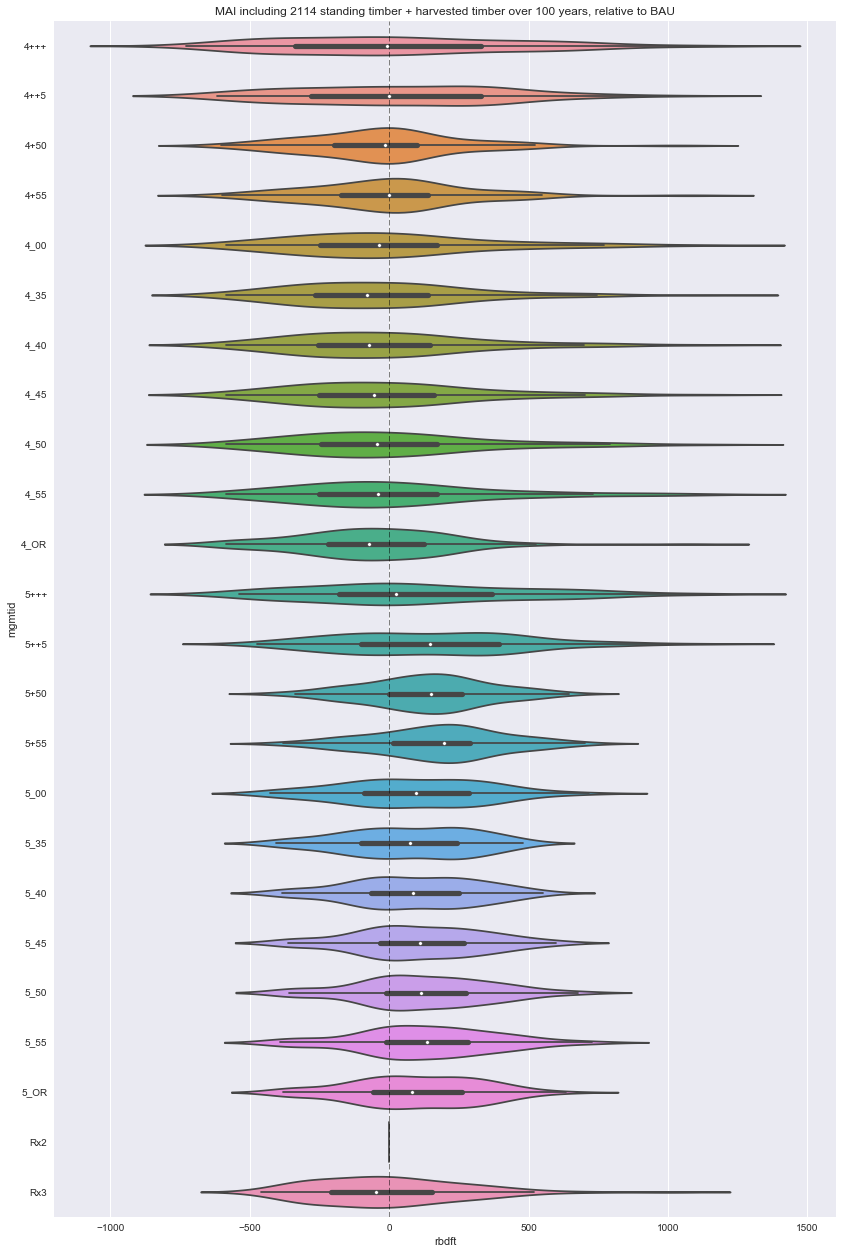

In [53]:
diff = regrouped.drop('bdft',1) - baseline[['rbdft', 'total_bdft', 'allcarbon']]
diff = diff.xs('PN', level='variant', drop_level=True)
fig, ax = plt.subplots(figsize=(14,22))
ax = sns.violinplot(y=diff.index.get_level_values(0), x=diff.rbdft/100, orient='h', split=True)
ax.set_title('MAI including 2114 standing timber + harvested timber over 100 years, relative to BAU')
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.5)

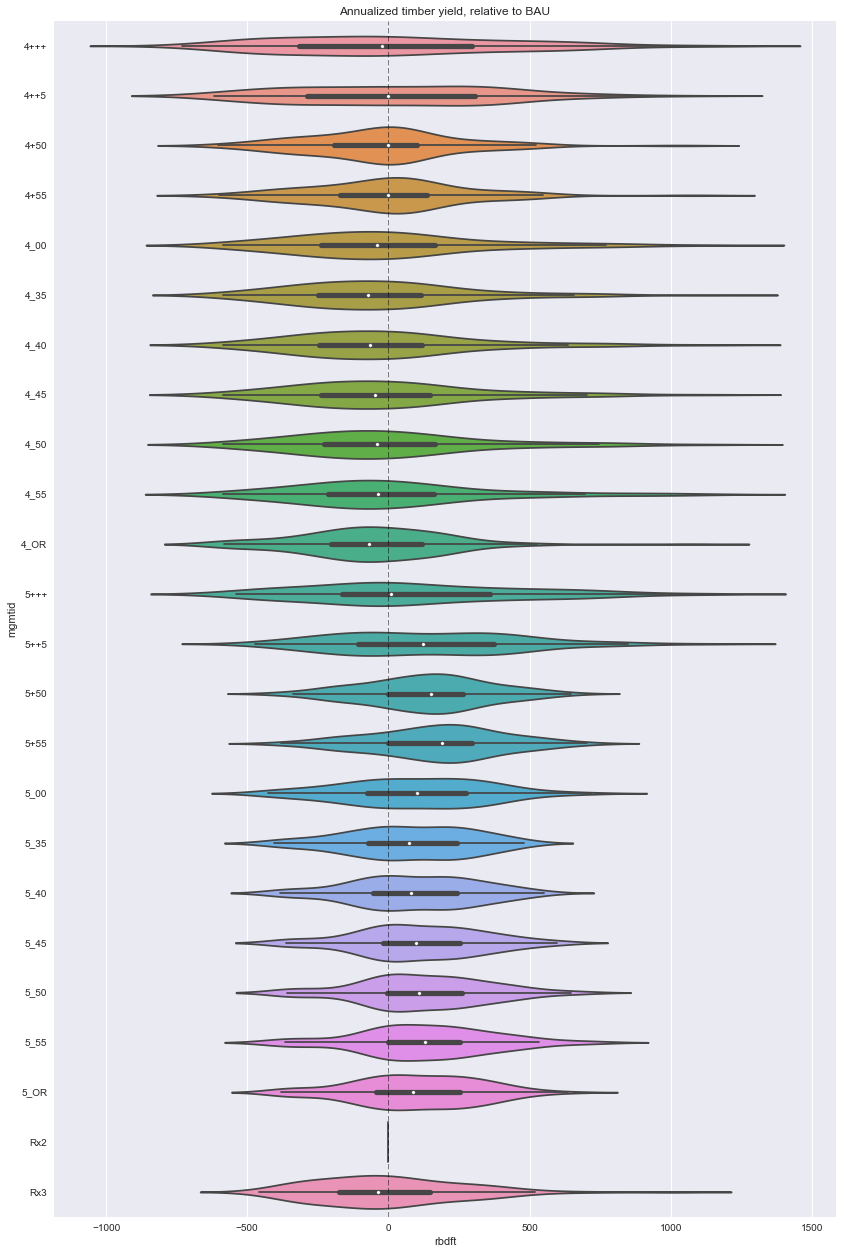

In [169]:
fig, ax = plt.subplots(figsize=(14,22))
ax = sns.violinplot(y=diff.index.get_level_values(0), x=diff.rbdft/100, orient='h')
ax.set_title('Annualized timber yield, relative to BAU')
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.5)

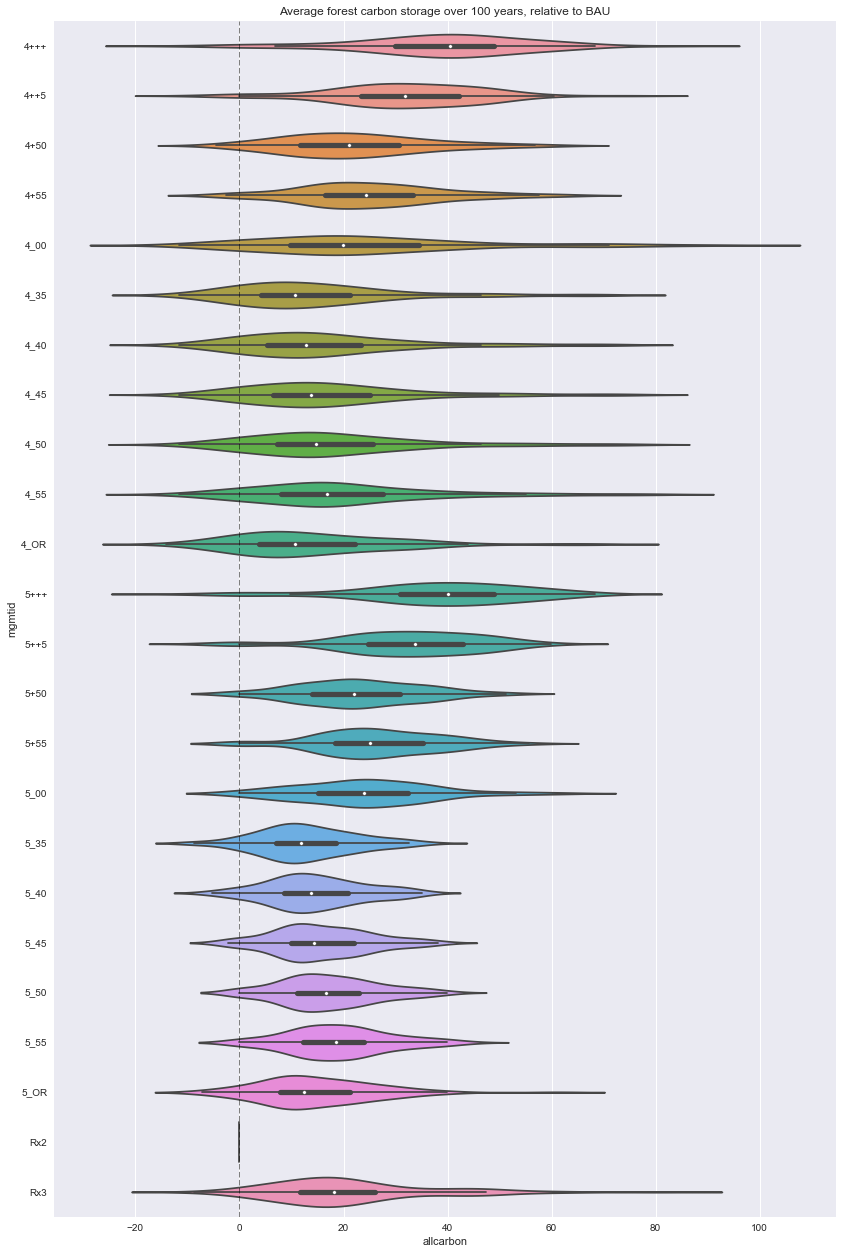

In [170]:
fig, ax = plt.subplots(figsize=(14,22))
ax = sns.violinplot(y=diff.index.get_level_values(0), x=diff.allcarbon, orient='h')
ax.set_title('Average forest carbon storage over 100 years, relative to BAU')
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.5)

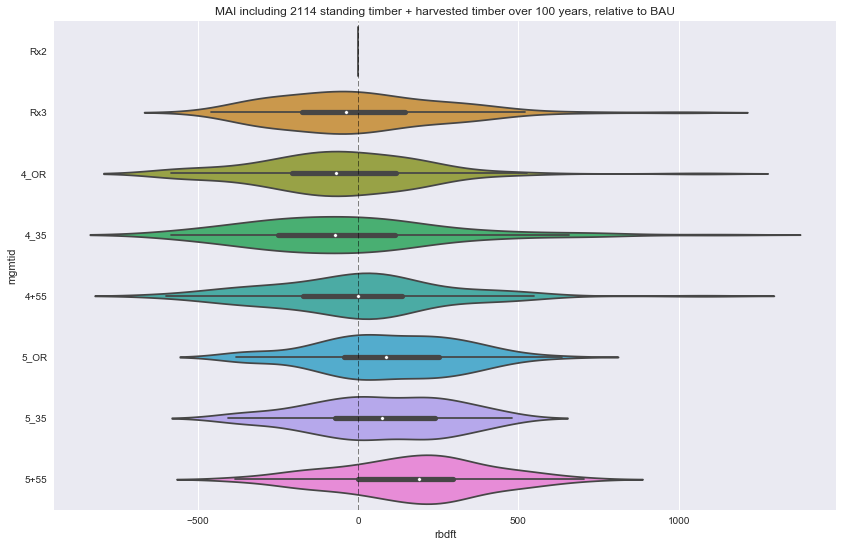

In [190]:
subset = regrouped.loc[regrouped.index.isin(['Rx2', 'Rx3', '4_OR', '4_35', '4+55', '5_OR', '5_35', '5+55'], level=0)]
diff = subset - baseline
fig, ax = plt.subplots(figsize=(14,9))
ax = sns.violinplot(y=diff.index.get_level_values(0), x=diff.rbdft/100, orient='h', order = ['Rx2', 'Rx3', '4_OR', '4_35', '4+55', '5_OR', '5_35', '5+55'])
ax.set_title('MAI including 2114 standing timber + harvested timber over 100 years, relative to BAU')
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.5)

In [139]:
conn = psycopg2.connect("dbname='Rotations' user='postgres' host='localhost'") # password in pgpass file
SQL = '''
SELECT summary.*, cases.variant
FROM summary, cases
WHERE summary.caseid = cases.caseid;
'''
# read the query into a pandas dataframe
Rotations = pd.read_sql(SQL, conn)

# close the database connection
conn.close()

In [140]:
Rotations.head()

,caseid,standid,year,age,tpa,ba,sdi,ccf,topht,qmd,...,attopht,atqmd,prdlen,acc,mort,mai,fortyp,sizecls,stkcls,variant
0,6cba1f48-a570-48ee-b433-7db93e987994,PN_110,0,0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.00000,3,0.0,0.0,0.0,999,5,5,PN
1,6cba1f48-a570-48ee-b433-7db93e987994,PN_110,3,3,450.0,0.0,2.0,9.0,7.0,0.30000,...,7.0,0.30000,3,15.0,0.0,0.0,201,3,3,PN
2,6cba1f48-a570-48ee-b433-7db93e987994,PN_110,6,6,441.0,6.0,22.0,40.0,15.0,1.53761,...,15.0,1.53761,3,43.0,0.0,0.0,201,3,3,PN
3,6cba1f48-a570-48ee-b433-7db93e987994,PN_110,9,9,433.0,18.0,54.0,64.0,23.0,2.72885,...,23.0,2.72885,3,79.0,1.0,0.0,201,3,3,PN
4,6cba1f48-a570-48ee-b433-7db93e987994,PN_110,12,12,424.0,32.0,88.0,87.0,30.0,3.74766,...,30.0,3.74766,3,289.0,3.0,0.0,201,3,3,PN


In [141]:
Rotations.columns

Index(['caseid', 'standid', 'year', 'age', 'tpa', 'ba', 'sdi', 'ccf', 'topht',
       'qmd', 'tcuft', 'mcuft', 'bdft', 'rtpa', 'rtcuft', 'rmcuft', 'rbdft',
       'atba', 'atsdi', 'atccf', 'attopht', 'atqmd', 'prdlen', 'acc', 'mort',
       'mai', 'fortyp', 'sizecls', 'stkcls', 'variant'],
      dtype='object')

In [142]:
Rotations['after_bdft'] = Rotations.bdft - Rotations.rbdft
stand_bdft = Rotations[['caseid', 'standid', 'year', 'after_bdft']].set_index(['caseid', 'standid', 'year'])
my_cols = ['caseid', 'standid', 'year', 'rbdft']
cum_rbdft = Rotations[my_cols].groupby(by=['caseid', 'standid', 'year']).sum().groupby(level=[0,1]).cumsum()
#cum_rbdft.head(20)
merged = pd.concat([stand_bdft, cum_rbdft], axis=1)
#merged.head(20)
merged = merged.reset_index()
merged['MAI'] = (merged.after_bdft + merged.rbdft)/merged.year
#merged.head(50)
merged['SI'] = merged.standid.apply(lambda x: x.split('_')[-1]).astype('int')
merged['variant'] = merged.standid.apply(lambda x: x.split('_')[0])

In [150]:
merged.head()

,caseid,standid,year,after_bdft,rbdft,MAI,SI,variant
0,00198b40-25cd-4373-acb3-bb8b2b60059a,PN_75,0,0.0,0.0,NaN,75,PN
1,00198b40-25cd-4373-acb3-bb8b2b60059a,PN_75,3,0.0,0.0,0.0,75,PN
2,00198b40-25cd-4373-acb3-bb8b2b60059a,PN_75,6,0.0,0.0,0.0,75,PN
3,00198b40-25cd-4373-acb3-bb8b2b60059a,PN_75,9,0.0,0.0,0.0,75,PN
4,00198b40-25cd-4373-acb3-bb8b2b60059a,PN_75,12,0.0,0.0,0.0,75,PN


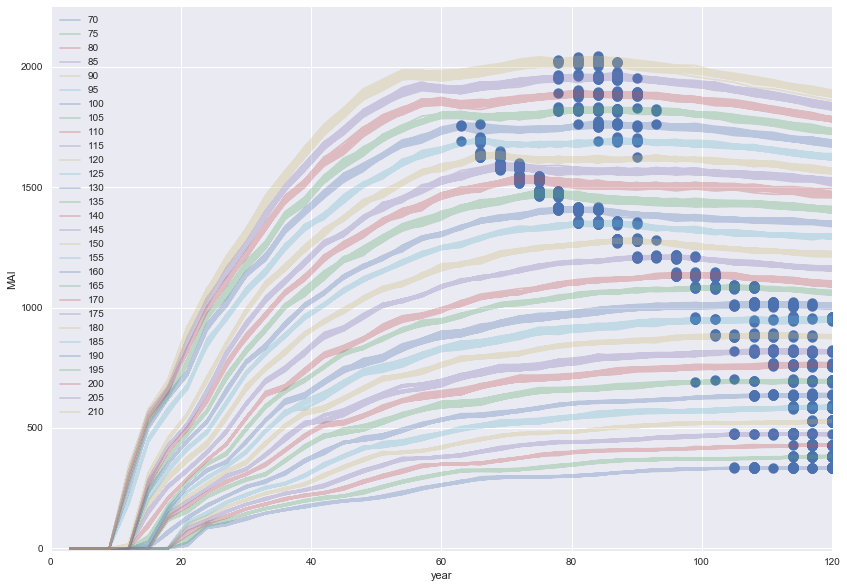

In [217]:
new_group = merged.loc[merged.variant=='WC'].copy()

# get max MAI observed for each stand in each run
idx = new_group[['caseid', 'standid', 'year', 'MAI']].groupby(['caseid', 'standid'])['MAI'].transform(max) == new_group['MAI']

# for PN variant, base age 50
new_group['site_class'] = pd.cut(new_group.SI, bins=[49, 75, 95, 115, 135, 161], labels=['V', 'IV', 'III', 'II', 'I'])
# for WC variant, base age 100
# new_group['site_class'] = pd.cut(new_group.SI, bins=[69, 95, 125, 155, 185, 211], labels=['V', 'IV', 'III', 'II', 'I'])

fig, ax = plt.subplots(figsize=(14,10))
colors = {'I':'#d7191c', 'II':'#fdae61', 'III':'#ffffbf', 'IV':'#abd9e9', 'V':'#2c7bb6'}
for name, group in new_group.groupby('SI'):
    group.plot(x='year', y='MAI', ax=ax, label=name, alpha=0.3)

new_group[idx].plot.scatter(x='year', y='MAI', ax=ax, s=100)

# get best-fit line of rotation ages by site index with np.polyfit
#x=new_group[idx].loc[(new_group.SI > 150) | (new_group.SI < 70)].groupby('SI').median().year
#y=new_group[idx].loc[(new_group.SI > 150) | (new_group.SI < 70)].groupby('SI').median().MAI
#m, b = np.polyfit(x,y, 1)
ax.set_ylim(-10, new_group.MAI.max()*1.10)
#graph_x = range(20,150)
#plt.plot(graph_x, m*graph_x + b, 'k--')
plt.show()

In [207]:
new_group.head()

,caseid,standid,year,after_bdft,rbdft,MAI,SI,variant,site_class
41,001bf202-1768-431e-aaf6-441765ac0415,WC_195,0,0.0,0.0,NaN,195,WC,NaN
42,001bf202-1768-431e-aaf6-441765ac0415,WC_195,3,0.0,0.0,0.000000,195,WC,NaN
43,001bf202-1768-431e-aaf6-441765ac0415,WC_195,6,0.0,0.0,0.000000,195,WC,NaN
44,001bf202-1768-431e-aaf6-441765ac0415,WC_195,9,0.0,0.0,0.000000,195,WC,NaN
45,001bf202-1768-431e-aaf6-441765ac0415,WC_195,12,3425.0,0.0,285.416667,195,WC,NaN


In [149]:
print(new_group.groupby('SI'))

In [212]:
new_group[idx].groupby('SI').median()

,year,after_bdft,rbdft,MAI
SI,,,,
70,114.0,27588.5,10759.5,335.445906
75,120.0,29122.0,16531.0,382.047149
80,117.0,34254.5,16165.5,430.432411
85,114.0,33363.5,20925.0,476.409774
90,120.0,41439.5,21906.5,528.502671
95,117.0,43154.5,26584.0,586.545659
100,114.0,46044.5,27583.0,636.166204
105,117.0,51184.5,28864.0,695.747863
110,117.0,54690.0,34231.5,760.422807


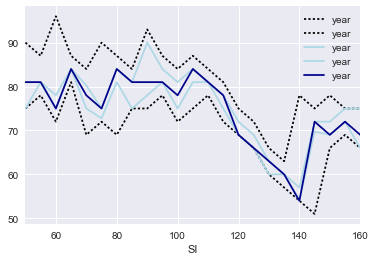

In [185]:
fig, ax = plt.subplots()
new_group[idx].groupby('SI').min().reset_index().plot(x='SI', y='year', ax=ax, color='black', linestyle=':')
new_group[idx].groupby('SI').max().reset_index().plot(x='SI', y='year', ax=ax, color='black', linestyle=':')
new_group[idx].groupby('SI').quantile(.75).reset_index().plot(x='SI', y='year', ax=ax, color='lightblue')
new_group[idx].groupby('SI').quantile(.25).reset_index().plot(x='SI', y='year', ax=ax, color='lightblue')
new_group[idx].groupby('SI').median().reset_index().plot(x='SI', y='year', ax=ax, color='darkblue')


In [175]:
indexed = new_group[['MAI','year', 'caseid', 'SI']].set_index(['year', 'SI'])
to_plot = index.to_panel()
to_plot = pd.panel(data=new_group[['MAI','year', 'caseid', 'SI']], items='caseid', major_axis='year', minor_axis='SI')
sns.tsplot(data=to_plot, values='MAI', time='year', units='caseid', condition='SI')

AttributeError: module 'pandas' has no attribute 'panel'

In [134]:
conn = psycopg2.connect("dbname='ShortRotations' user='postgres' host='localhost'") # password in pgpass file
SQL = '''
SELECT caseid, standid, year, pnv
FROM econsummary;
'''
# read the query into a pandas dataframe
ShortRotations = pd.read_sql(SQL, conn)

# close the database connection
conn.close()

In [135]:
ShortRotations['variant'] = ShortRotations['standid'].apply(lambda x: x.split('_')[0])
ShortRotations['site_index'] = ShortRotations['standid'].apply(lambda x: x.split('_')[-1]).astype('int')
# calculate indexes for rows that have the highest PNV for a rotation
short_idx = ShortRotations[['caseid', 'standid', 'year', 'pnv']].groupby(['caseid', 'standid'])['pnv'].transform(max) == ShortRotations['pnv']

C:\Users\ddiaz\AppData\Local\Continuum\Anaconda2\envs\Py3.5\lib\site-packages\ipykernel\__main__.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\ddiaz\AppData\Local\Continuum\Anaconda2\envs\Py3.5\lib\site-packages\ipykernel\__main__.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\ddiaz\AppData\Local\Continuum\Anaconda2\envs\Py3.5\lib\site-packages\ipykernel\__main__.py:24: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


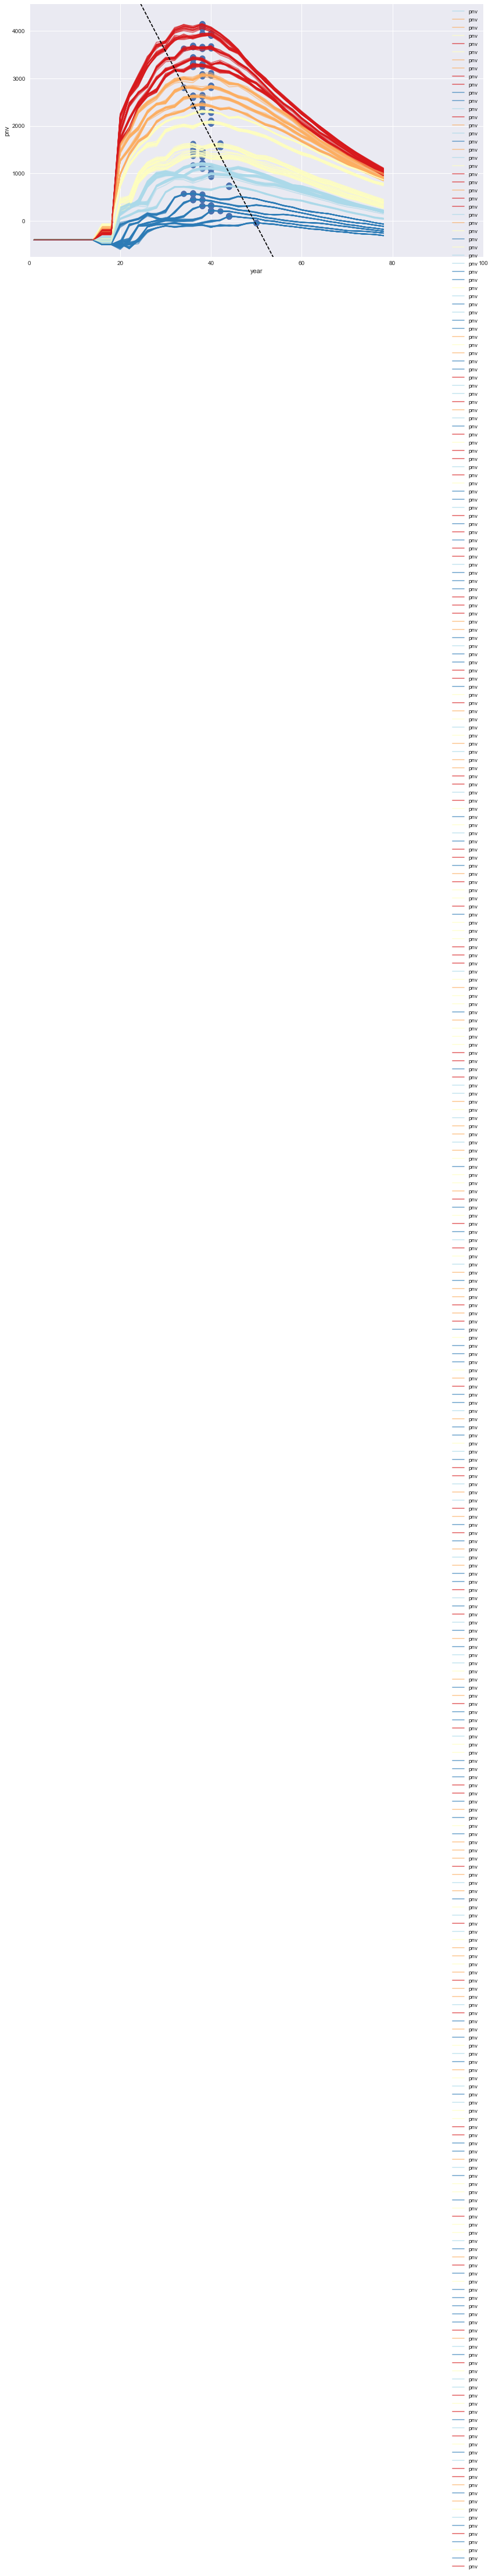

In [138]:
var = 'PN'
var_short = ShortRotations.loc[ShortRotations.variant==var].copy()
if var == 'PN':
    var_short['site_class'] = pd.cut(var_short.site_index, bins=[49, 75, 95, 115, 135, 161], labels=['V', 'IV', 'III', 'II', 'I'])
elif var == 'WC':
    var_short['site_class'] = pd.cut(var_short.site_index, bins=[69, 95, 125, 155, 185, 211], labels=['V', 'IV', 'III', 'II', 'I'])

fig, ax = plt.subplots(figsize=(14,8))
colors = {'I':'#d7191c', 'II':'#fdae61', 'III':'#ffffbf', 'IV':'#abd9e9', 'V':'#2c7bb6'}

for name, group in var_short.groupby(['site_index']):
    group.plot(x='year', y='pnv', ax=ax, color=colors[pd.unique(group.site_class)[0]], alpha=0.6)

ShortRotations[short_idx].loc[ShortRotations.variant==var].plot.scatter(x='year', y='pnv', ax=ax, s=100)

# get best-fit line of rotation ages by site index with np.polyfit
x=var_short[short_idx].year
y=var_short[short_idx].pnv
m, b = np.polyfit(x,y, 1)
ax.set_ylim(var_short.pnv.min()*1.25, var_short.pnv.max()*1.10)
ax.set_xlim(0,100)

graph_x = range(20,60)
plt.plot(graph_x, m*graph_x + b, 'k--')
plt.show()
plt.show()

In [219]:
var = 'PN'
var_short = ShortRotations.loc[ShortRotations.variant==var].copy()
var_short[short_idx].groupby('site_index').median()

C:\Users\ddiaz\AppData\Local\Continuum\Anaconda2\envs\Py3.5\lib\site-packages\ipykernel\__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


,year,pnv
site_index,,
50,50,-35.57955
55,44,102.41200
60,40,214.99700
65,40,323.47900
70,36,451.64800
75,36,577.02100
80,44,735.10500
85,40,988.97700
90,40,1114.56000


In [220]:
var = 'WC'
var_short = ShortRotations.loc[ShortRotations.variant==var].copy()
var_short[short_idx].groupby('site_index').median()

C:\Users\ddiaz\AppData\Local\Continuum\Anaconda2\envs\Py3.5\lib\site-packages\ipykernel\__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


,year,pnv
site_index,,
70,58,-218.9260
75,54,-156.8600
80,50,-90.4371
85,48,-27.5117
90,48,41.6834
95,46,118.2290
100,44,210.9490
105,52,293.5410
110,50,400.6560
